<a href="https://colab.research.google.com/github/iilln/Graduation-Project/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import re
from joblib import load


In [ ]:
# Sample trained model (you need to load your actual trained model and vectorizer)
# Ensure you save your trained SVM model and vectorizer for this step.
# from joblib import load
vectorizer = load('/content/drive/MyDrive/مشروع التخرج/vectorizer.pkl')
svm_model_linear = load('/content/drive/MyDrive/مشروع التخرج/svm_model.pkl')

# Replace this with actual loading in your code
#vectorizer = TfidfVectorizer(ngram_range=(1, 2))
#svm_model_linear = SVC(kernel='linear', C=1)

# Preprocessing function to clean the input tweet
def preprocess_tweet(tweet):
    tweet = tweet.lower()  # Convert to lowercase
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
    tweet = re.sub(r'\d+', '', tweet)  # Remove numbers
    return tweet

# Input tweet
input_tweet = input("Enter a tweet: ")

# Preprocess the tweet
cleaned_tweet = preprocess_tweet(input_tweet)

# Vectorize the tweet
vectorized_tweet = vectorizer.transform([cleaned_tweet])

# Predict the label
prediction = svm_model_linear.predict(vectorized_tweet)

# Output the result
if prediction[0] == 0:
    print("The tweet is classified as: Normal")
else:
    print("The tweet is classified as: Not Normal")

The tweet is classified as: Normal


In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import dask.dataframe as dd
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/مشروع التخرج/Dataset/arabic_datasetM.2.csv', sep=';')
#df = pd.read_csv('/content/drive/MyDrive/مشروع التخرج/Dataset/arabic_datasetM.2.csv', names=['Tweet','Label'])

In [ ]:
print(df.head())

   #                                              Tweet  Label
0  0     #فتاة_تايلاند تلك فَعْله لا تفعلها الحَرائِر .      1
1  1          #رهف_القنون الله لا يبلانا ويجبر مصابهم .      1
2  1  @abdullahalsaleh واذا انرفض قبول لجوئها لا اشو...      1
3  3  #رهف_القنون الانتقام من الذات،في كل ضحكة لها أ...      1
4  4  #رهف_القنون انا اعيش حرة وفي نعيم اذا احد اخطا...      0


In [ ]:
df['Tweet'].value_counts()

,count
Tweet,
@abnaslmaan1 @saudibus222 انا مسلم والحمد لله وليس هناك سوى مسلم او غير مسلم الشيعه هذا دين غير الاسلام وكلنا يعرف خطرهم على الامه والاسلام ولكن اليس من العجيب انهم يسيطرون على كل الدول التي تدخلت بها السعوديه والدليل: السعوديه مولت الحرب على صدام فاحتلها الفرس تدخلو في سوريا واحتلها الفرس,3
@_mdx1 @Fahran85 @al_doosi7 @iiip0qjjj @CpAnt3 @fahad989322 @tttt89673 @Fattempts1 @ReeeemAlfalaaa @sunrisesa4 @ksa_n_MBS @tyiutyut @Omer66M @otaibi_sss @The_Saudi_girl @yassersaad13921 @vi_ksa @dr_psych_2u @albandry202030 @abus121212 @ALReem0192 @abo1234mohammed @asdgjfxkdsrhfzf @dehbashe @ghl6263 #صبيان تم فرضهم على #جدة و #مكة و #المدينة و #الحجاز #وافدين و #مجنسين ثم تسويقهم على #المملكة_العربية_السعودية ويتطاولون على #المجتمع_السعودي وولاة أمرنا و علماؤنا و #عقيدة_السعودية و #أبناء_القبائل و #العسكر رمز قوة الدول⁉️ قبل الدمار العربي ووقت الدمار و بعد #الدمار_العربي https://t.co/8A4tbaFqvs,3
#محمد_بن_سلمان سيفٌ سعودي.. معينٌ من الإنجاز والطموح.. يحمل أحلامنا.. وللنور هو ضياء اللهم وفقه.. وبارك له في عمله وعمره https://t.co/aPH6uAZc6J,3
#الصحة تعلن عن نتائج تحقيقات مستشفى محايل العام. https://t.co/ekIJTsfDP9 https://t.co/1H7voH2fFA,3
🆎 هل يعقل عدد كامل لمجلة اليمامة عن الحج يعده محرر غير سعودي (سامي التتر) أين السعوديين؟! أين الصحفيين السعوديين؟! أين مؤسسة اليمامة؟! أين وزارة العمل؟! أين التوطين؟! أين أبناء الوطن في إعلامنا الذي كل يوم يقوده الأجنبي؟! أين #السعودية_أولاً ؟! https://t.co/xUnjk6cR60,3
...,...
@sara_tah0un لا معنديش فيلم عربي مفضل والله 😂😂 بس دا من المسليات لما تفتحي التليفزيون ومتلقييش حاجة ،بعيدا عن ان السينيما المصرية كلها مسليات مش افلام تتشاف يعني,1
"بابا بيقول لمسلسل العاصوف ""معصوب"" 😂💔",1
#العاصوف الحلقه اليوم همز ولمز احنا السعوديين مانتغطى برا,1


In [ ]:
# length of dataset
len(df)

9316

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9316 entries, 0 to 9315
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       9316 non-null   int64 
 1   Tweet   9316 non-null   object
 2   Label   9316 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 218.5+ KB


In [ ]:
# Checking for null values
np.sum(df.isnull())
df=df.dropna(axis=0, how='any')

df = df.drop_duplicates(subset=['Tweet'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9190 entries, 0 to 9315
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       9190 non-null   int64 
 1   Tweet   9190 non-null   object
 2   Label   9190 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 287.2+ KB


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
# storing the data in lists
tweet, type = list(df['Tweet']), list(df['Label'])

In [ ]:
df.iloc[0][0]

<ipython-input-31-01306538005d>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[0][0]


0

In [ ]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['Label_encoded'] = labelencoder.fit_transform(df['Label'])

In [ ]:
df[['Label', 'Label_encoded']].value_counts()

,,count
Label,Label_encoded,
0,0,6346
1,1,2844


In [ ]:
# converting tweet text to lower case
df['Tweet'] = df['Tweet'].str.lower()
df.tail()

,#,Tweet,Label,Label_encoded
9311,9393,@y_aden4 عادهم الا فتكرو انهم قبايل كله عشان ا...,1,1
9312,9394,@2nno4 @pdry1990 و كمان كانت رافضه لقرار الوحد...,0,0
9313,9395,@ajabreaking يجب أن يتوقف القتال بين المسلمين ...,1,1
9314,9396,أول هزيمة للشعب الجزائري في هذه الأوضاع تكمن ف...,0,0
9315,9397,#البيان_السعودي_الاماراتي ضاعت اليمن بوسط البي...,0,0


In [ ]:
# stopwords list that needs to be excluded from the data
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# removing stopwoords from the tweet text
STOPWORDS = set(stopwordlist)

def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['Tweet'] = df['Tweet'].apply(lambda text: clean_stopwords(text))

In [ ]:
# cleaning and removing punctuations

import string
english_puctuations = string.punctuation

def clean_puctuations(text):
    translator = str.maketrans('','', english_puctuations)
    return text.translate(translator)

df['Tweet'] = df['Tweet'].apply(lambda x : clean_puctuations(x))

In [ ]:
df.tail()

,#,Tweet,Label,Label_encoded
9311,9393,yaden4 عادهم الا فتكرو انهم قبايل كله عشان الج...,1,1
9312,9394,2nno4 pdry1990 و كمان كانت رافضه لقرار الوحدة ...,0,0
9313,9395,ajabreaking يجب أن يتوقف القتال بين المسلمين ا...,1,1
9314,9396,أول هزيمة للشعب الجزائري في هذه الأوضاع تكمن ف...,0,0
9315,9397,البيانالسعوديالاماراتي ضاعت اليمن بوسط البيانا...,0,0


In [ ]:
# cleaning and removing repeating characters

def clean_repeating_characters(text):
    return re.sub(r'(.)1+', r'1', text)

df['Tweet'] = df['Tweet'].apply(lambda x: clean_repeating_characters(x))

In [ ]:
df.tail()

,#,Tweet,Label,Label_encoded
9311,9393,yaden4 عادهم الا فتكرو انهم قبايل كله عشان الج...,1,1
9312,9394,2nno4 pdr1990 و كمان كانت رافضه لقرار الوحدة و...,0,0
9313,9395,ajabreaking يجب أن يتوقف القتال بين المسلمين ا...,1,1
9314,9396,أول هزيمة للشعب الجزائري في هذه الأوضاع تكمن ف...,0,0
9315,9397,البيانالسعوديالاماراتي ضاعت اليمن بوسط البيانا...,0,0


In [ ]:
# cleaning and removing URLs

def clean_URLs(text):
    return re.sub(r"((www.[^s]+)|(http\S+))","",text)

df['Tweet'] = df['Tweet'].apply(lambda x : clean_URLs(x))

In [ ]:
df.tail()

,#,Tweet,Label,Label_encoded
9311,9393,yaden4 عادهم الا فتكرو انهم قبايل كله عشان الج...,1,1
9312,9394,2nno4 pdr1990 و كمان كانت رافضه لقرار الوحدة و...,0,0
9313,9395,ajabreaking يجب أن يتوقف القتال بين المسلمين ا...,1,1
9314,9396,أول هزيمة للشعب الجزائري في هذه الأوضاع تكمن ف...,0,0
9315,9397,البيانالسعوديالاماراتي ضاعت اليمن بوسط البيانا...,0,0


In [ ]:
import re

# Function to clean numeric data from a string
def clean_numeric(text):
    return re.sub('[0-9]+', '', text)  # Remove numeric characters

# Apply the function to each row in the 'Tweet' column
df['Tweet'] = df['Tweet'].apply(clean_numeric)

# Display the cleaned DataFrame
df.head()

,#,Tweet,Label,Label_encoded
0,0,فتاةتايلاند تلك فَعْله لا تفعلها الحَرائِر,1,1
1,1,رهفالقنون الله لا يبلانا ويجبر مصابهم,1,1
2,1,abdullahalsaleh واذا انرفض قبول لجوئها لا اشوف...,1,1
3,3,رهفالقنون الانتقام من الذات،في كل ضحكة لها ألم...,1,1
4,4,رهفالقنون انا اعيش حرة وفي نعيم اذا احد اخطاء ...,0,0


In [ ]:
df.tail()

,#,Tweet,Label,Label_encoded
9311,9393,yaden عادهم الا فتكرو انهم قبايل كله عشان الجن...,1,1
9312,9394,nno pdr و كمان كانت رافضه لقرار الوحدة وكان عن...,0,0
9313,9395,ajabreaking يجب أن يتوقف القتال بين المسلمين ا...,1,1
9314,9396,أول هزيمة للشعب الجزائري في هذه الأوضاع تكمن ف...,0,0
9315,9397,البيانالسعوديالاماراتي ضاعت اليمن بوسط البيانا...,0,0


In [ ]:
# Tokenization of tweet text

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
df['Tweet'] = df['Tweet'].apply(tokenizer.tokenize)

In [ ]:
df.tail()

,#,Tweet,Label,Label_encoded
9311,9393,"[yaden, عادهم, الا, فتكرو, انهم, قبايل, كله, ع...",1,1
9312,9394,"[nno, pdr, و, كمان, كانت, رافضه, لقرار, الوحدة...",0,0
9313,9395,"[ajabreaking, يجب, أن, يتوقف, القتال, بين, الم...",1,1
9314,9396,"[أول, هزيمة, للشعب, الجزائري, في, هذه, الأوضاع...",0,0
9315,9397,"[البيانالسعوديالاماراتي, ضاعت, اليمن, بوسط, ال...",0,0


In [ ]:
# stemming

import nltk

st = nltk.PorterStemmer()

def text_stemming(text):
    text = [st.stem(word) for word in text]
    return text

df['Tweet'] = df['Tweet'].apply(lambda x: text_stemming(x))

In [ ]:
df.head()

,#,Tweet,Label,Label_encoded
0,0,"[فتاةتايلاند, تلك, ف, ع, له, لا, تفعلها, الح, ...",1,1
1,1,"[رهفالقنون, الله, لا, يبلانا, ويجبر, مصابهم]",1,1
2,1,"[abdullahalsaleh, واذا, انرفض, قبول, لجوئها, ل...",1,1
3,3,"[رهفالقنون, الانتقام, من, الذات, في, كل, ضحكة,...",1,1
4,4,"[رهفالقنون, انا, اعيش, حرة, وفي, نعيم, اذا, اح...",0,0


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# lemmatization

lm = nltk.WordNetLemmatizer()

def text_lemmatization(text):
    text = [lm.lemmatize(word) for word in text]
    return text

df['Tweet'] = df['Tweet'].apply(lambda x: text_lemmatization(x))

In [ ]:
df['Tweet'].head()

,Tweet
0,"[فتاةتايلاند, تلك, ف, ع, له, لا, تفعلها, الح, ..."
1,"[رهفالقنون, الله, لا, يبلانا, ويجبر, مصابهم]"
2,"[abdullahalsaleh, واذا, انرفض, قبول, لجوئها, ل..."
3,"[رهفالقنون, الانتقام, من, الذات, في, كل, ضحكة,..."
4,"[رهفالقنون, انا, اعيش, حرة, وفي, نعيم, اذا, اح..."


In [ ]:
df[['Label','Label_encoded']].value_counts()

,,count
Label,Label_encoded,
0,0,6346
1,1,2844


In [ ]:
new_df = df
new_df = new_df[new_df['Label'] != 'other_Label']
new_df = new_df[new_df['Label'] != 'not_Label']
new_df = new_df['Tweet'].apply(lambda x: " ".join(x))

In [ ]:
new_df

,Tweet
0,فتاةتايلاند تلك ف ع له لا تفعلها الح رائ ر
1,رهفالقنون الله لا يبلانا ويجبر مصابهم
2,abdullahalsaleh واذا انرفض قبول لجوئها لا اشوف...
3,رهفالقنون الانتقام من الذات في كل ضحكة لها ألم...
4,رهفالقنون انا اعيش حرة وفي نعيم اذا احد اخطاء ...
...,...
9311,yaden عادهم الا فتكرو انهم قبايل كله عشان الجن...
9312,nno pdr و كمان كانت رافضه لقرار الوحدة وكان عن...
9313,ajabreak يجب أن يتوقف القتال بين المسلمين السن...
9314,أول هزيمة للشعب الجزائري في هذه الأوضاع تكمن ف...


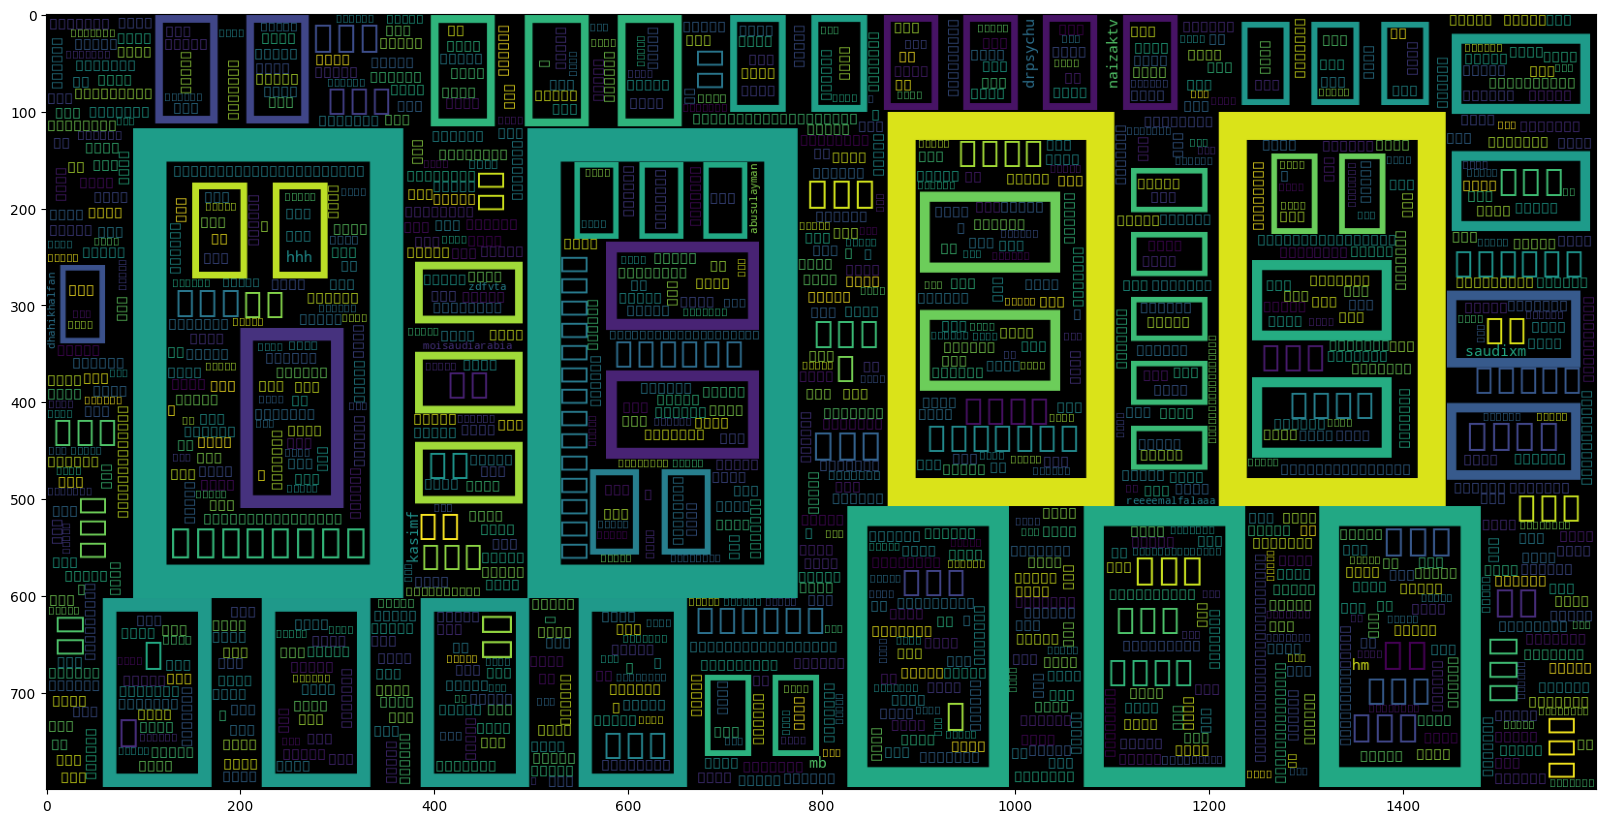

In [ ]:
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800,
                collocations= False).generate(' '.join(new_df))
plt.imshow(wc)

In [ ]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['#', 'Tweet', 'Label', 'Label_encoded'], dtype='object')


In [ ]:
df = df.rename(columns={'Label': 'Label'})

In [ ]:
df['Tweet'] = df['Tweet'].apply(lambda x : " ".join(x))
df

,#,Tweet,Label,Label_encoded
0,0,فتاةتايلاند تلك ف ع له لا تفعلها الح رائ ر,1,1
1,1,رهفالقنون الله لا يبلانا ويجبر مصابهم,1,1
2,1,abdullahalsaleh واذا انرفض قبول لجوئها لا اشوف...,1,1
3,3,رهفالقنون الانتقام من الذات في كل ضحكة لها ألم...,1,1
4,4,رهفالقنون انا اعيش حرة وفي نعيم اذا احد اخطاء ...,0,0
...,...,...,...,...
9311,9393,yaden عادهم الا فتكرو انهم قبايل كله عشان الجن...,1,1
9312,9394,nno pdr و كمان كانت رافضه لقرار الوحدة وكان عن...,0,0
9313,9395,ajabreak يجب أن يتوقف القتال بين المسلمين السن...,1,1
9314,9396,أول هزيمة للشعب الجزائري في هذه الأوضاع تكمن ف...,0,0


In [ ]:
# Splitting the data into train and test
X, y = df['Tweet'], df['Label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 41)

In [ ]:
# Transforming the data using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 100000)
vectoriser.fit(X_train)
print("No. of feature words: ",len(vectoriser.get_feature_names_out())) # Use get_feature_names_out()

No. of feature words:  100000


In [ ]:
# transforming the data
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [ ]:
# Model
from sklearn.svm import SVC
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train, y_train)
svm_predictions  = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)
#dataset0= 0.7067046688382194


0.794341675734494


Stoooop here

In [ ]:
#Building the Decision Tree Model on our dataset
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
DT_predict = DT_model.predict(X_test) #Predictions on Testing data
accuracy = DT_model.score(X_test, y_test)
print(accuracy)

0.03359803721634369


In [ ]:
example = np.zeros(100)
example = ["y'all hoes avoid schemes"]
example = vectoriser.transform(example)
example

<1x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [ ]:
example = np.zeros(100)
example = ["'yall pussies i swur']",]
print(example)
example = vectoriser.transform(example)
print(example)


["'yall pussies i swur']"]



In [ ]:
svm_model_linear.predict(example)

array([0])